In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
file_path = "data.csv"
df = pd.read_csv(file_path)
print(df.info())
print(df.isnull().sum())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


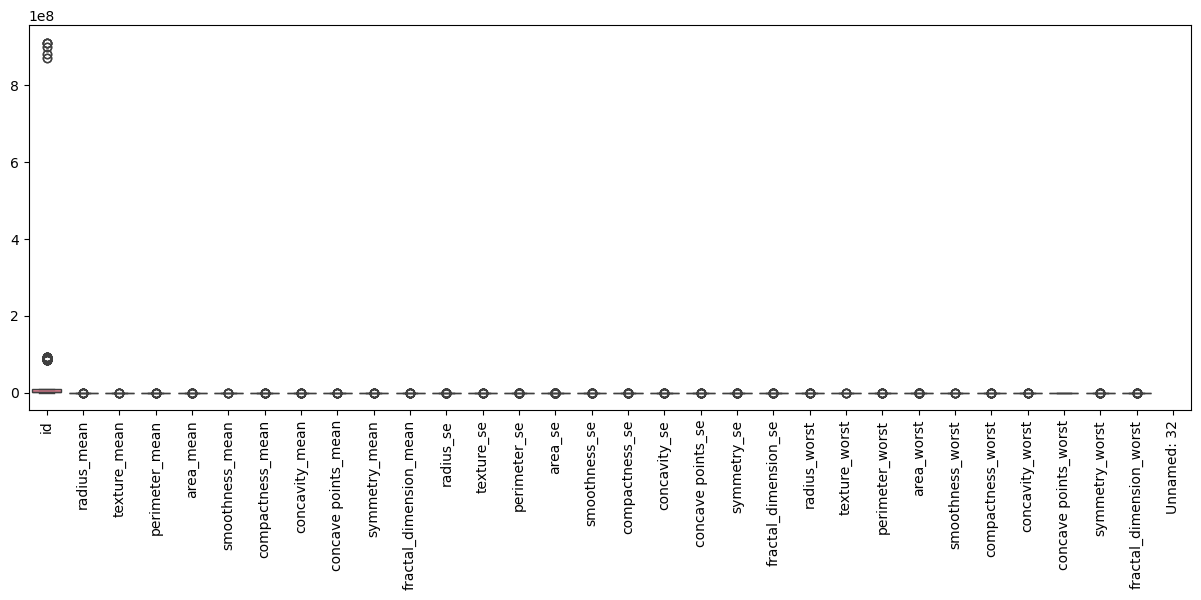

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [8]:
# Box plot
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum() 


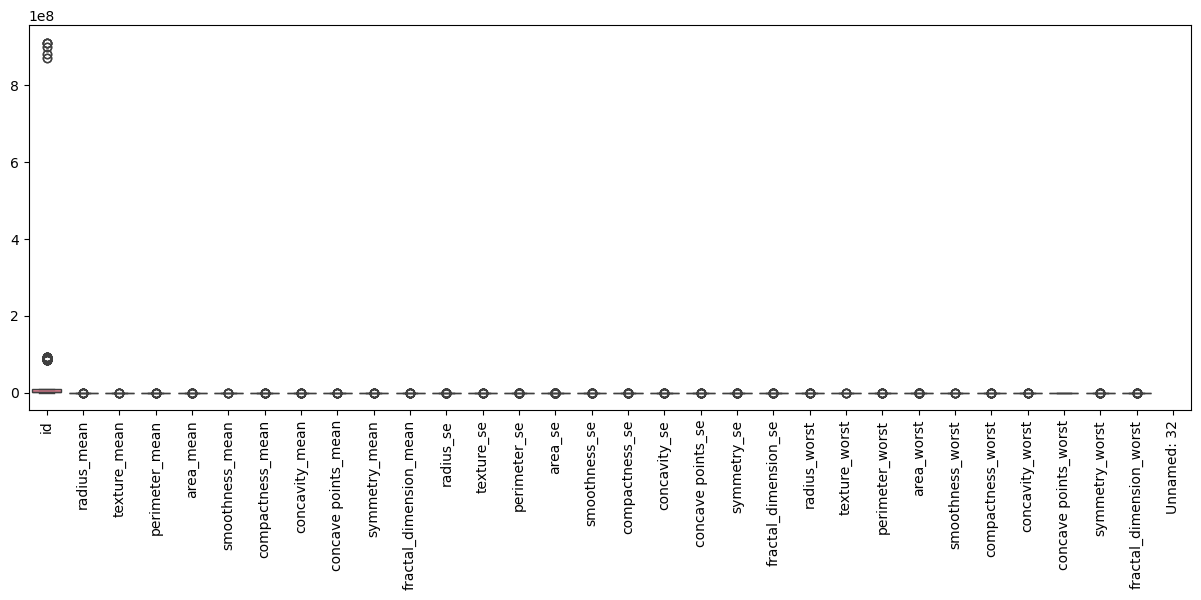

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


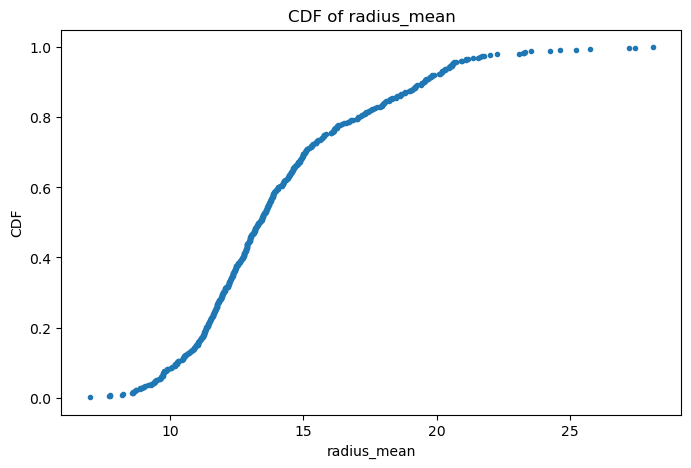

In [11]:
feature = "radius_mean"  
x = np.sort(df[feature])
y = np.arange(1, len(x)+1) / len(x)
plt.figure(figsize=(8,5))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel(feature)
plt.ylabel("CDF")
plt.title(f"CDF of {feature}")
plt.show()


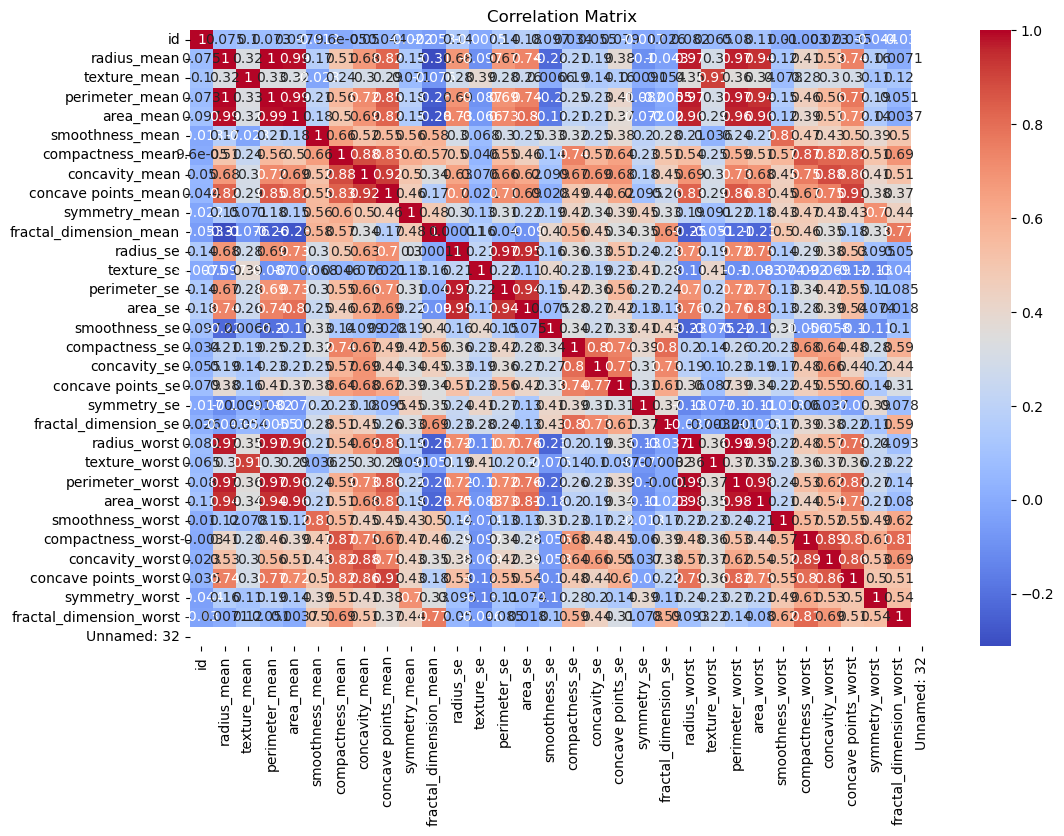

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.563015e+16,3.287883e+07,5.364807e+07,2.222490e+08,4.262946e+09,-22802.053383,631.883924,499127.721282,214217.739286,-75792.615857,...,4.973106e+07,3.360214e+08,7.629681e+09,29510.163781,-58383.413342,605181.617857,289052.809853,-342061.639212,-67437.508622,NaN
radius_mean,3.287883e+07,1.241892e+01,4.907582e+00,8.544714e+01,1.224483e+03,0.008454,0.094197,0.190128,0.112475,0.014273,...,6.433100e+00,1.142886e+02,1.888227e+03,0.009625,0.229249,0.387386,0.172393,0.035746,0.000450,NaN
texture_mean,5.364807e+07,4.907582e+00,1.849891e+01,3.443976e+01,4.859938e+02,-0.001415,0.053767,0.103692,0.048977,0.008419,...,2.411015e+01,5.174593e+01,8.412838e+02,0.007611,0.188010,0.270110,0.083491,0.027942,0.009260,NaN
perimeter_mean,2.222490e+08,8.544714e+01,3.443976e+01,5.904405e+02,8.435772e+03,0.070836,0.714714,1.387234,0.802360,0.121922,...,4.525811e+01,7.923282e+02,1.302615e+04,0.083526,1.742478,2.858506,1.231848,0.284300,0.022391,NaN
area_mean,4.262946e+09,1.224483e+03,4.859938e+02,8.435772e+03,1.238436e+05,0.876178,9.264931,19.244924,11.241958,1.459596,...,6.218249e+02,1.134179e+04,1.921926e+05,0.992514,21.616602,37.634415,16.701789,3.125809,0.023756,NaN
smoothness_mean,-2.280205e+04,8.454460e-03,-1.414779e-03,7.083607e-02,8.761781e-01,0.000198,0.000490,0.000585,0.000302,0.000215,...,3.118110e-03,1.128795e-01,1.655299e+00,0.000259,0.001045,0.001276,0.000465,0.000343,0.000127,NaN
compactness_mean,6.318839e+02,9.419706e-02,5.376681e-02,7.147141e-01,9.264931e+00,0.000490,0.002789,0.003718,0.001703,0.000873,...,8.054412e-02,1.047413e+00,1.532344e+01,0.000682,0.007194,0.008994,0.002831,0.001667,0.000656,NaN
concavity_mean,4.991277e+05,1.901276e-01,1.036923e-01,1.387234e+00,1.924492e+01,0.000585,0.003718,0.006355,0.002850,0.001094,...,1.469342e-01,1.954350e+00,3.068241e+01,0.000817,0.009469,0.014704,0.004513,0.002020,0.000741,NaN
concave points_mean,2.142177e+05,1.124751e-01,4.897693e-02,8.023604e-01,1.124196e+01,0.000302,0.001703,0.002850,0.001506,0.000492,...,6.981902e-02,1.116016e+00,1.788688e+01,0.000401,0.004075,0.006091,0.002321,0.000902,0.000258,NaN
symmetry_mean,-7.579262e+04,1.427317e-02,8.418876e-03,1.219216e-01,1.459596e+00,0.000215,0.000873,0.001094,0.000492,0.000752,...,1.527421e-02,2.018958e-01,2.765725e+00,0.000267,0.002041,0.002481,0.000775,0.001187,0.000217,NaN


In [15]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numerical columns
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
df_numeric.cov()


In [17]:
from scipy.stats import pearsonr

feature1 = "radius_mean"
feature2 = "texture_mean"
corr, _ = pearsonr(df[feature1], df[feature2])
print(f"Pearson correlation coefficient between {feature1} and {feature2}: {corr}")


Pearson correlation coefficient between radius_mean and texture_mean: 0.323781890927733


In [18]:
from scipy.stats import ttest_ind
group1 = df[df["diagnosis"] == "M"]["radius_mean"]
group2 = df[df["diagnosis"] == "B"]["radius_mean"]
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis - significant difference exists")
else:
    print("Fail to reject null hypothesis - no significant difference")


T-statistic: 25.435821610057054, P-value: 8.465940572262422e-96
Reject null hypothesis - significant difference exists


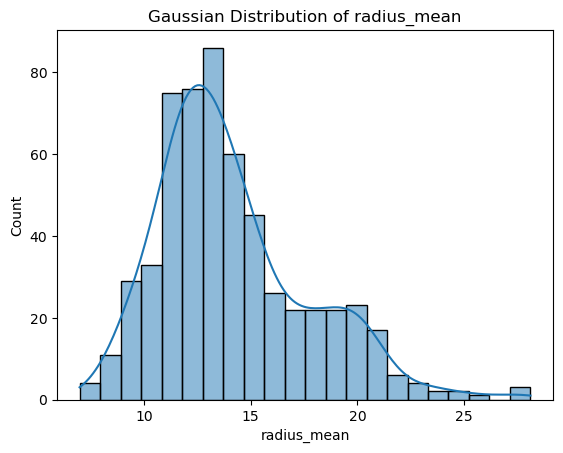

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,z_score
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1.097064
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1.829821
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1.579888
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,-0.768909
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1.750297


In [20]:
# Plot Gaussian distribution
feature = "radius_mean"
sns.histplot(df[feature], kde=True)
plt.title(f"Gaussian Distribution of {feature}")
plt.show()
df["z_score"] = stats.zscore(df[feature])
df.head()
